<a href="https://colab.research.google.com/github/Vinayak1205/DEVProject/blob/main/ProjectDEV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The following code will only execute
# successfully when compression is complete

# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "maheshmani13/bse-sensex-10-year-stock-price",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3145767663.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


ValueError: Unsupported file extension: ''. Supported file extensions are: .csv, .tsv, .json, .jsonl, .xml, .parquet, .feather, .sqlite, .sqlite3, .db, .db3, .s3db, .dl3, .xls, .xlsx, .xlsm, .xlsb, .odf, .ods, .odt

Saving Sensex_historical_price.csv to Sensex_historical_price (4).csv
      Day Month  Year     Open     High      Low    Close  Adj Close  Volume  \
6575    1   Jul  1997  4263.11  4301.77  4247.66  4300.86    4300.86     NaN   
6574    2   Jul  1997  4302.96  4395.31  4295.40  4333.90    4333.90     NaN   
6573    3   Jul  1997  4335.79  4393.29  4299.97  4323.46    4323.46     NaN   
6572    4   Jul  1997  4332.70  4347.59  4300.58  4323.82    4323.82     NaN   
6571    7   Jul  1997  4326.81  4391.01  4289.49  4291.45    4291.45     NaN   

           Date  
6575 1997-07-01  
6574 1997-07-02  
6573 1997-07-03  
6572 1997-07-04  
6571 1997-07-07  


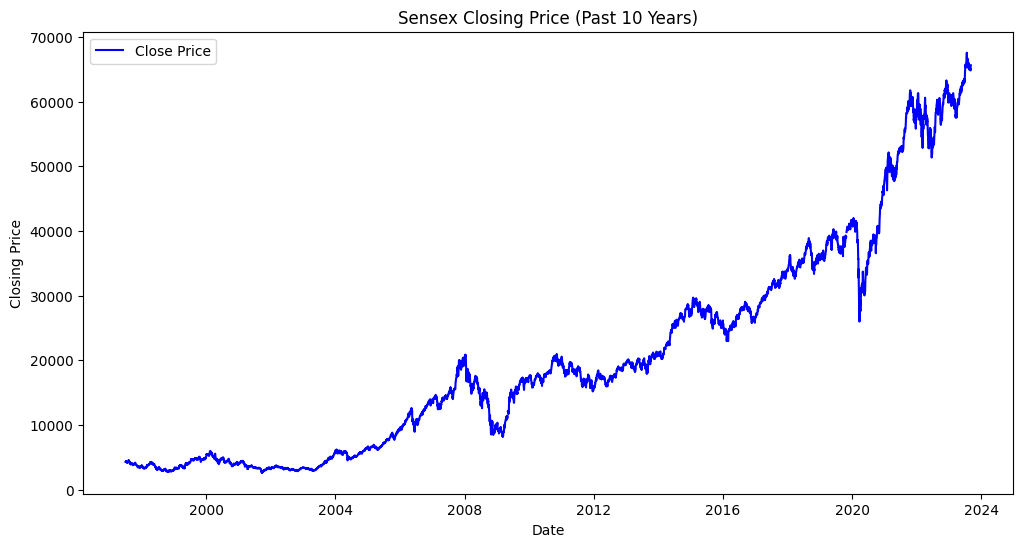

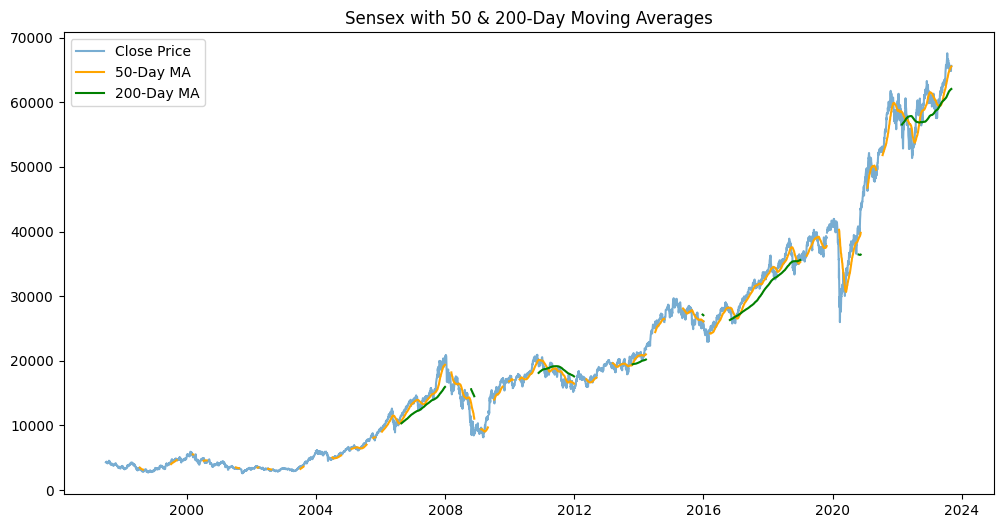

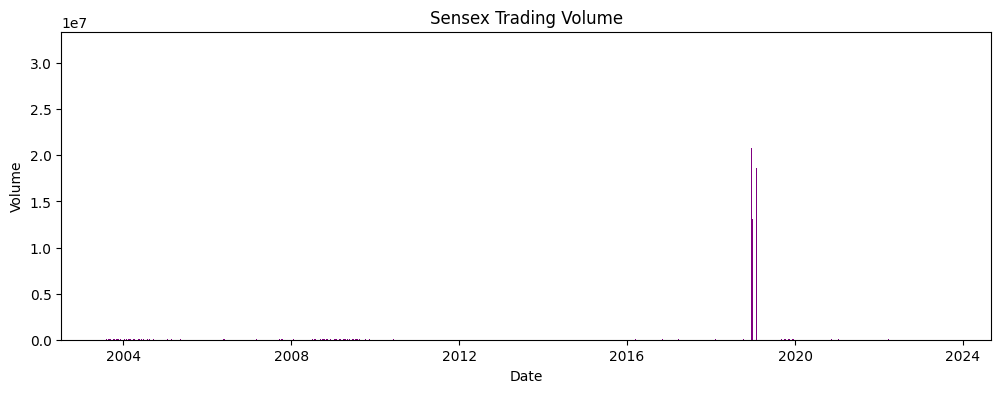

/tmp/ipython-input-798358591.py:74: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



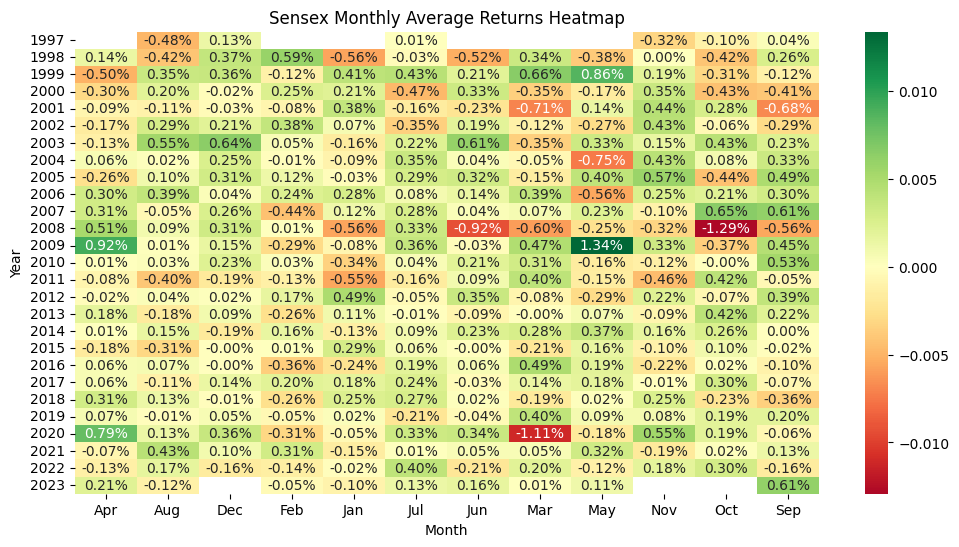

In [8]:
# Step 1: Upload your sensex.csv file
from google.colab import files
uploaded = files.upload()   # Select your CSV file

# Step 2: Load data with Pandas
import pandas as pd

df = pd.read_csv("Sensex_historical_price.csv")

# Clean price and volume columns by removing commas and converting to numeric
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


# Combine Year, Month, Day into single Date column
# Concatenate the date parts into a single string and specify the format
df['Date'] = pd.to_datetime(df['Day'].astype(str) + '-' + df['Month'] + '-' + df['Year'].astype(str), format='%d-%b-%Y')


# Sort by Date
df = df.sort_values('Date')

# Check the structure
print(df.head())

# Step 3: Line Chart – Closing Price
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Close Price", color="blue")
plt.title("Sensex Closing Price (Past 10 Years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Step 4: Candlestick Chart
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.update_layout(title="Sensex Candlestick Chart", xaxis_rangeslider_visible=False)
fig.show()

# Step 5: Moving Averages
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='green')
plt.title("Sensex with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()

# Step 6: Volume Chart
plt.figure(figsize=(12,4))
plt.bar(df['Date'], df['Volume'], color='purple')
plt.title("Sensex Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Step 7: Heatmap of Monthly Returns
import seaborn as sns

df['Return'] = df['Close'].pct_change()

pivot = df.pivot_table(index='Year', columns='Month', values='Return', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
plt.title("Sensex Monthly Average Returns Heatmap")
plt.show()

Saving Sensex_historical_price.csv to Sensex_historical_price (5).csv
      Day Month  Year     Open     High      Low    Close  Adj Close  Volume  \
6575    1   Jul  1997  4263.11  4301.77  4247.66  4300.86    4300.86     NaN   
6574    2   Jul  1997  4302.96  4395.31  4295.40  4333.90    4333.90     NaN   
6573    3   Jul  1997  4335.79  4393.29  4299.97  4323.46    4323.46     NaN   
6572    4   Jul  1997  4332.70  4347.59  4300.58  4323.82    4323.82     NaN   
6571    7   Jul  1997  4326.81  4391.01  4289.49  4291.45    4291.45     NaN   

           Date  
6575 1997-07-01  
6574 1997-07-02  
6573 1997-07-03  
6572 1997-07-04  
6571 1997-07-07  


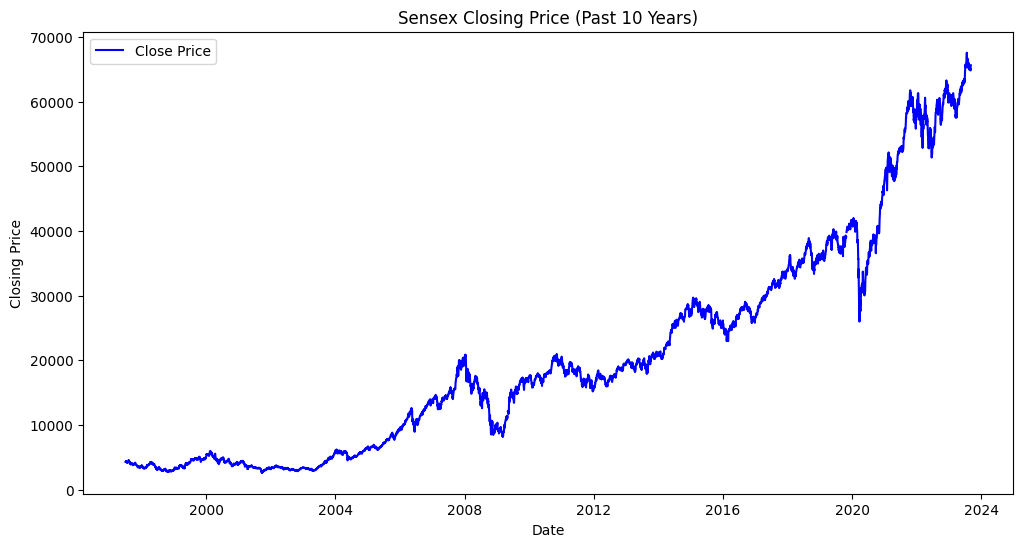

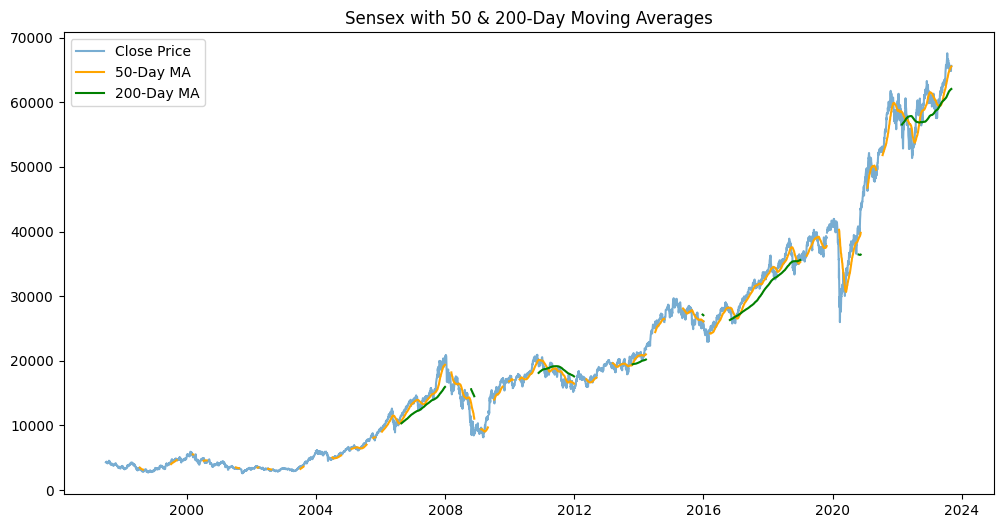

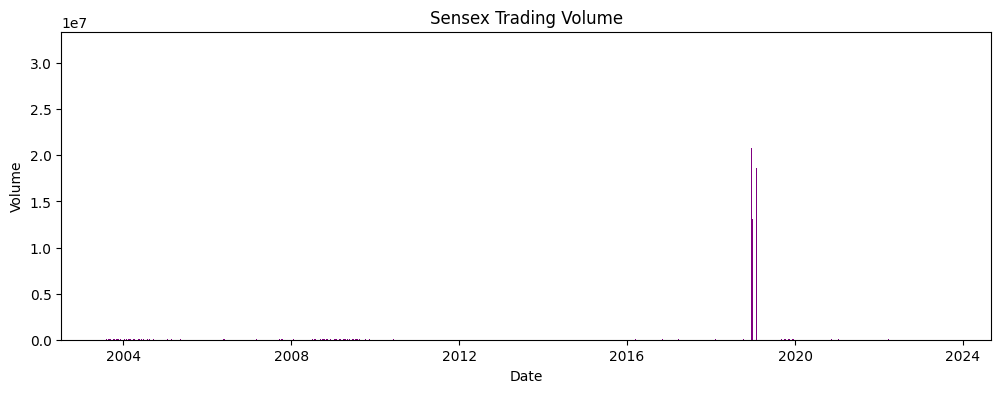

/tmp/ipython-input-1971985529.py:84: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



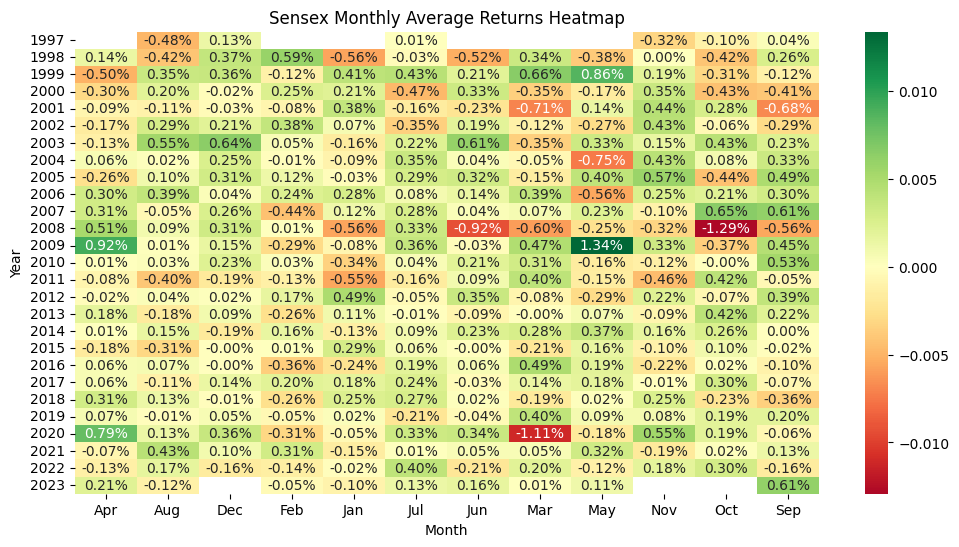

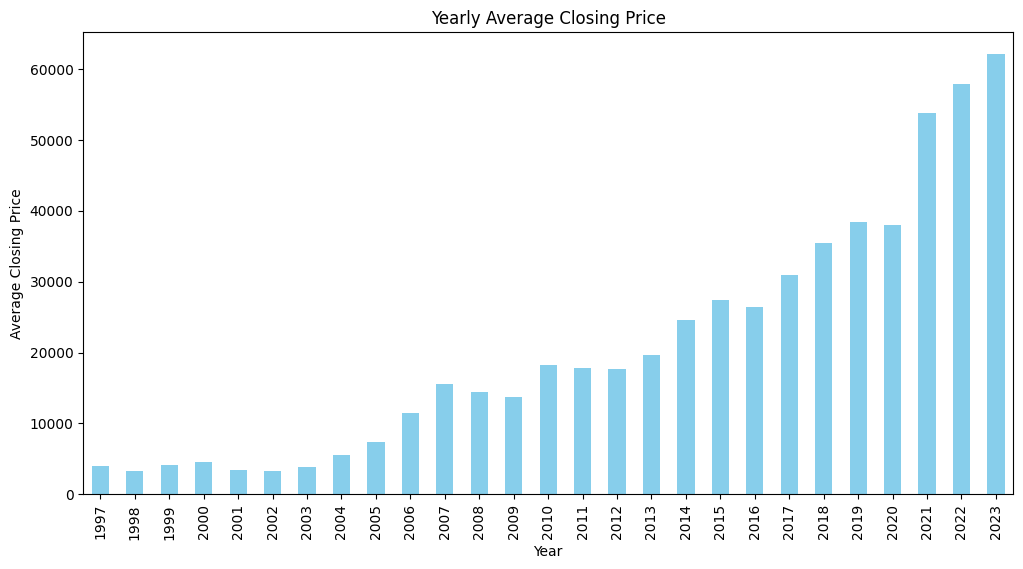

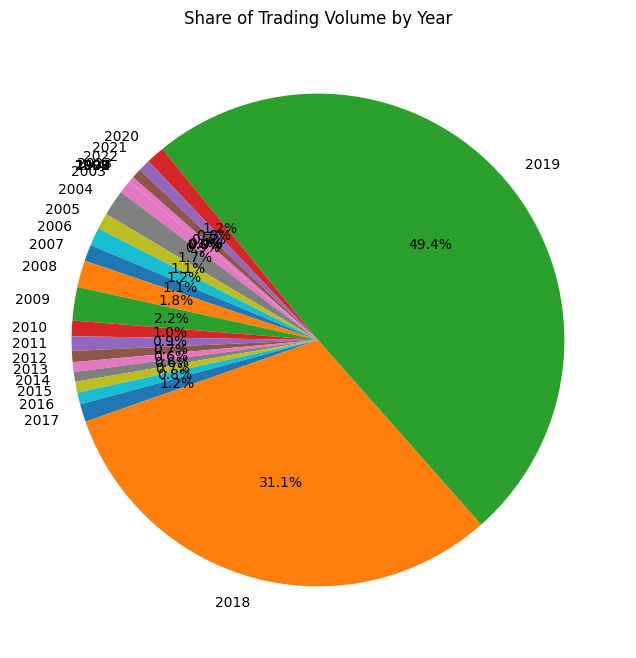

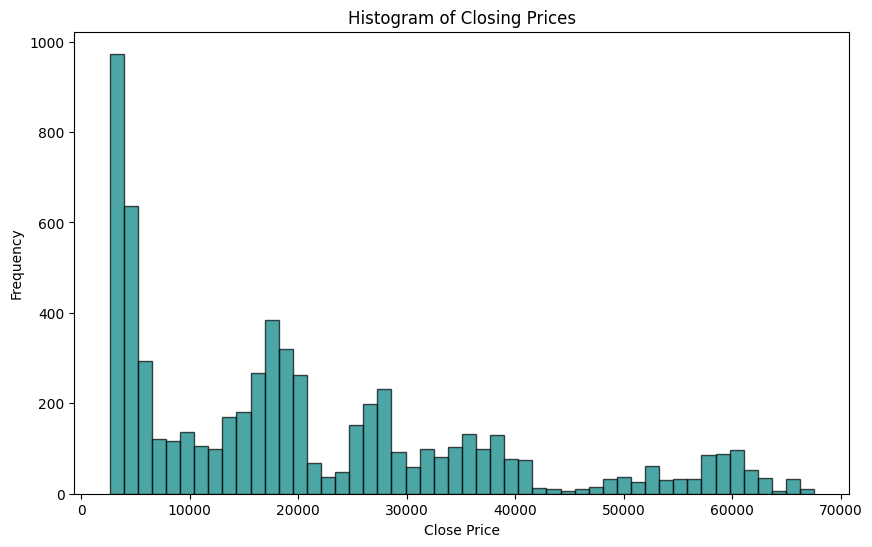

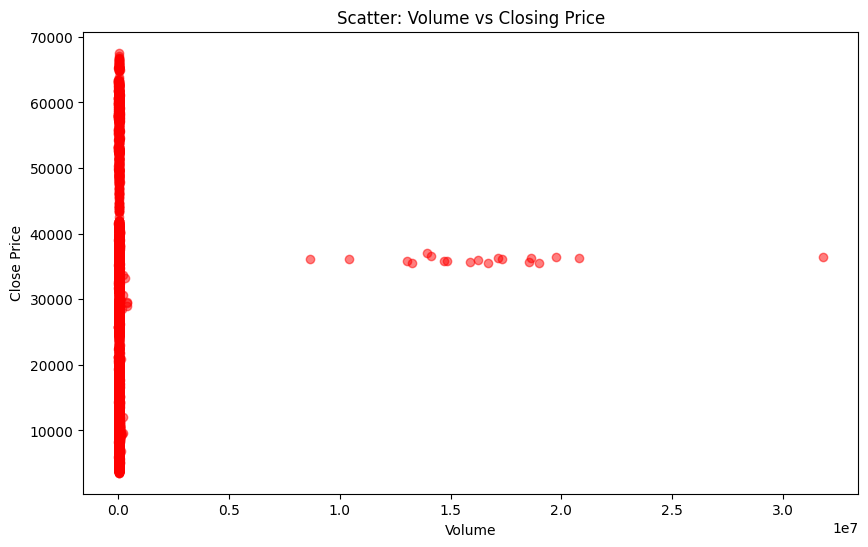

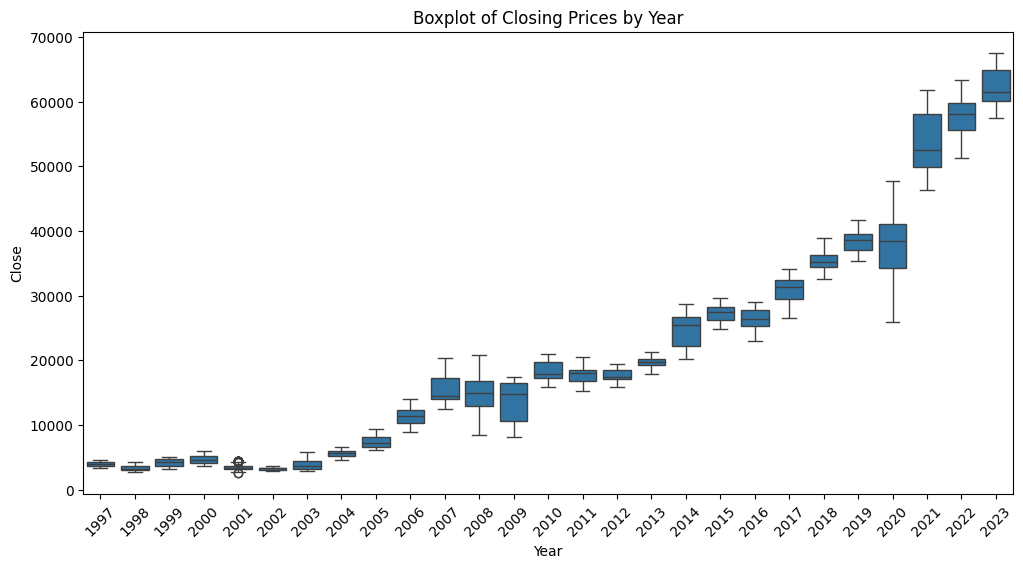

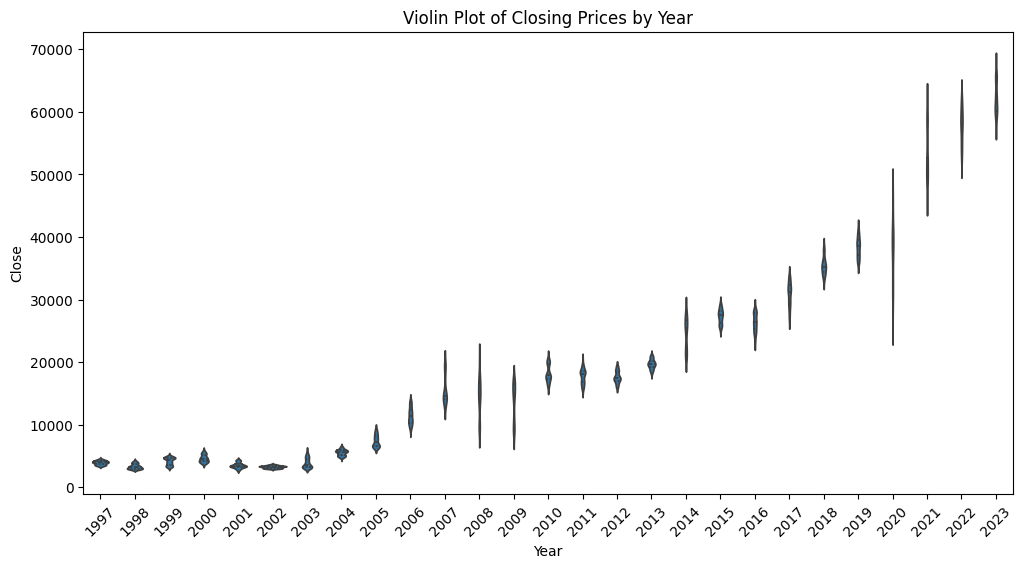

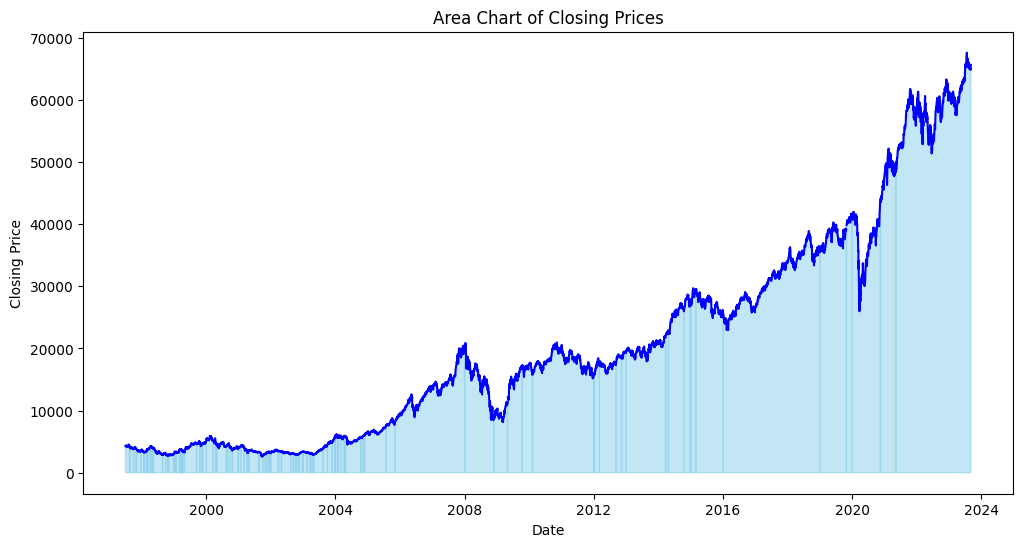

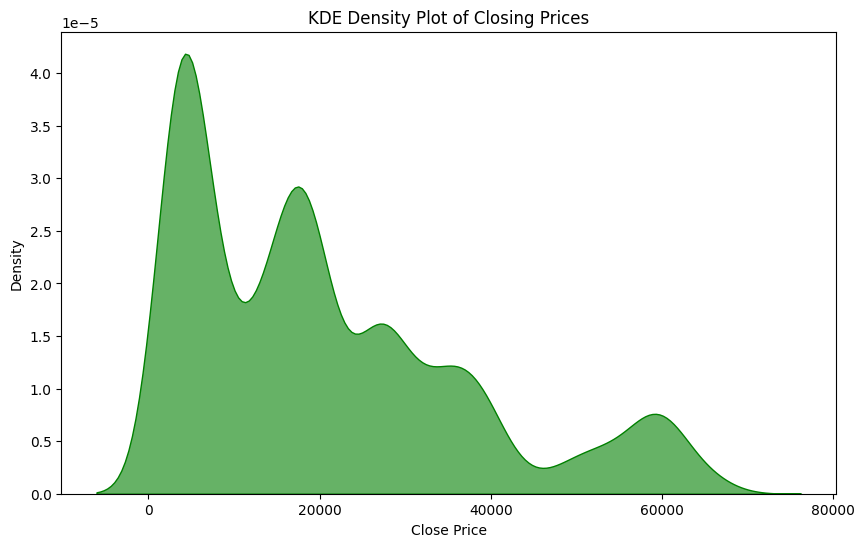

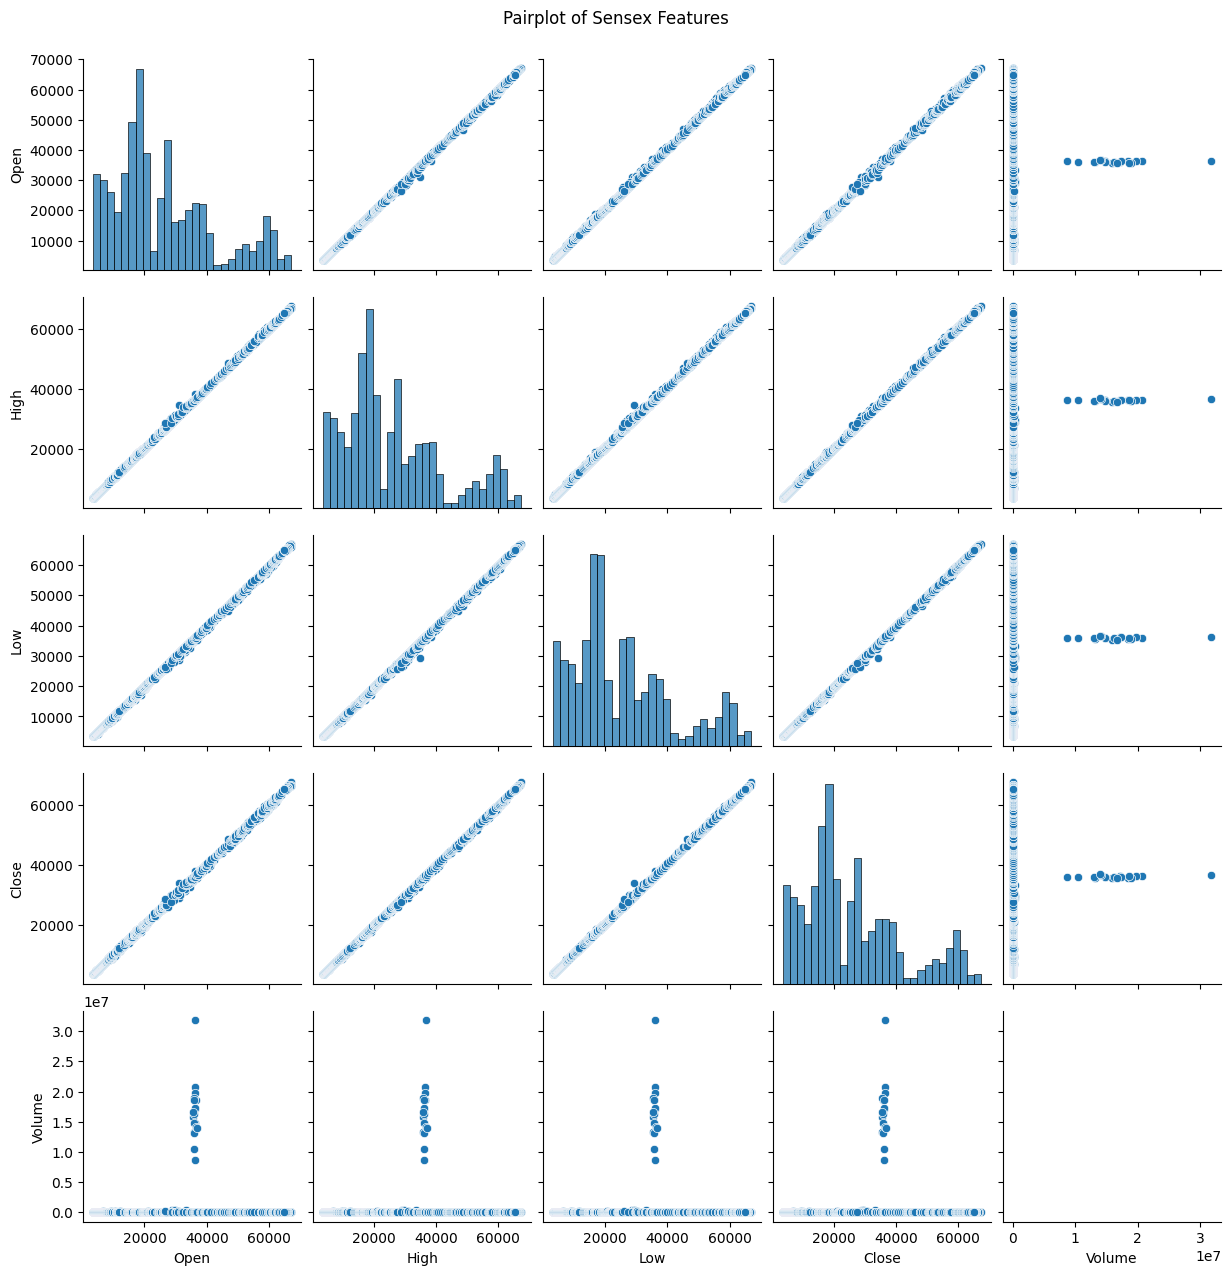

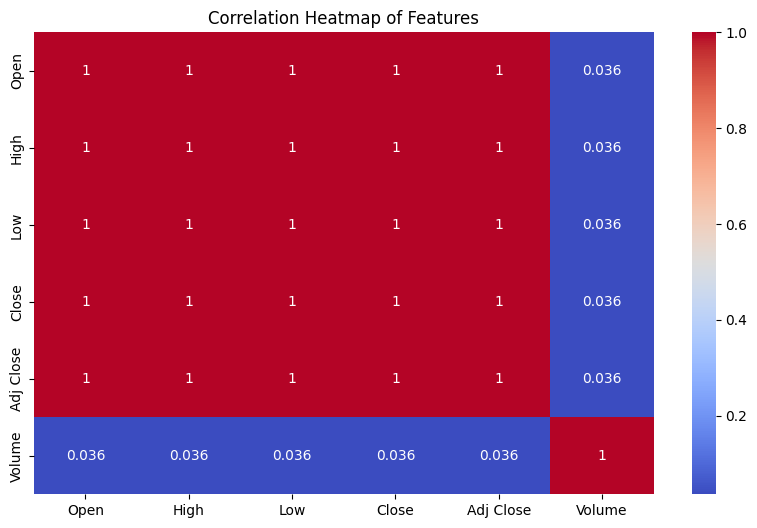

In [9]:
# Step 1: Upload your sensex.csv file
from google.colab import files
uploaded = files.upload()   # Select your CSV file

# Step 2: Load data with Pandas
import pandas as pd

df = pd.read_csv("Sensex_historical_price.csv")

# Clean price and volume columns by removing commas and converting to numeric
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Combine Year, Month, Day into single Date column
df['Date'] = pd.to_datetime(
    df['Day'].astype(str) + '-' + df['Month'] + '-' + df['Year'].astype(str),
    format='%d-%b-%Y'
)

# Sort by Date
df = df.sort_values('Date')

# Check structure
print(df.head())

# ================================
# Step 3: Line Chart – Closing Price
# ================================
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Close Price", color="blue")
plt.title("Sensex Closing Price (Past 10 Years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# ================================
# Step 4: Candlestick Chart
# ================================
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
fig.update_layout(title="Sensex Candlestick Chart", xaxis_rangeslider_visible=False)
fig.show()

# ================================
# Step 5: Moving Averages
# ================================
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='green')
plt.title("Sensex with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()

# ================================
# Step 6: Volume Chart
# ================================
plt.figure(figsize=(12,4))
plt.bar(df['Date'], df['Volume'], color='purple')
plt.title("Sensex Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# ================================
# Step 7: Heatmap of Monthly Returns
# ================================
import seaborn as sns

df['Return'] = df['Close'].pct_change()

pivot = df.pivot_table(index='Year', columns='Month', values='Return', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
plt.title("Sensex Monthly Average Returns Heatmap")
plt.show()

# ================================
# EXTRA CHARTS
# ================================

# Step 8: Bar Chart – Yearly Average Close Price
yearly_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(12,6))
yearly_avg.plot(kind='bar', color='skyblue')
plt.title("Yearly Average Closing Price")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.show()

# Step 9: Pie Chart – Share of Total Trading Volume by Year
yearly_volume = df.groupby('Year')['Volume'].sum()

plt.figure(figsize=(8,8))
plt.pie(yearly_volume, labels=yearly_volume.index, autopct='%1.1f%%', startangle=140)
plt.title("Share of Trading Volume by Year")
plt.show()

# Step 10: Histogram – Distribution of Closing Prices
plt.figure(figsize=(10,6))
plt.hist(df['Close'], bins=50, color='teal', edgecolor='black', alpha=0.7)
plt.title("Histogram of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

# Step 11: Scatter Plot – Volume vs Closing Price
plt.figure(figsize=(10,6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='red')
plt.title("Scatter: Volume vs Closing Price")
plt.xlabel("Volume")
plt.ylabel("Close Price")
plt.show()

# Step 12: Box Plot – Closing Prices by Year
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='Close', data=df)
plt.title("Boxplot of Closing Prices by Year")
plt.xticks(rotation=45)
plt.show()

# Step 13: Violin Plot – Closing Prices by Year
plt.figure(figsize=(12,6))
sns.violinplot(x='Year', y='Close', data=df, inner="quartile")
plt.title("Violin Plot of Closing Prices by Year")
plt.xticks(rotation=45)
plt.show()

# Step 14: Area Chart – Closing Price Trend
plt.figure(figsize=(12,6))
plt.fill_between(df['Date'], df['Close'], color="skyblue", alpha=0.5)
plt.plot(df['Date'], df['Close'], color="blue", linewidth=1.5)
plt.title("Area Chart of Closing Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

# Step 15: KDE Plot – Closing Price Distribution
plt.figure(figsize=(10,6))
sns.kdeplot(df['Close'], fill=True, color="green", alpha=0.6)
plt.title("KDE Density Plot of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Density")
plt.show()

# Step 16: Pair Plot – Relationships between Features
sns.pairplot(df[['Open','High','Low','Close','Volume']].dropna())
plt.suptitle("Pairplot of Sensex Features", y=1.02)
plt.show()

# Step 17: Correlation Heatmap – Between Features
plt.figure(figsize=(10,6))
sns.heatmap(df[['Open','High','Low','Close','Adj Close','Volume']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


Saving Sensex_historical_price.csv to Sensex_historical_price (6).csv
   Day Month  Year     Open     High      Low    Close  Adj Close  Volume  \
0    1   Jul  1997  4263.11  4301.77  4247.66  4300.86    4300.86     NaN   
1    2   Jul  1997  4302.96  4395.31  4295.40  4333.90    4333.90     NaN   
2    3   Jul  1997  4335.79  4393.29  4299.97  4323.46    4323.46     NaN   
3    4   Jul  1997  4332.70  4347.59  4300.58  4323.82    4323.82     NaN   
4    7   Jul  1997  4326.81  4391.01  4289.49  4291.45    4291.45     NaN   

        Date  
0 1997-07-01  
1 1997-07-02  
2 1997-07-03  
3 1997-07-04  
4 1997-07-07  


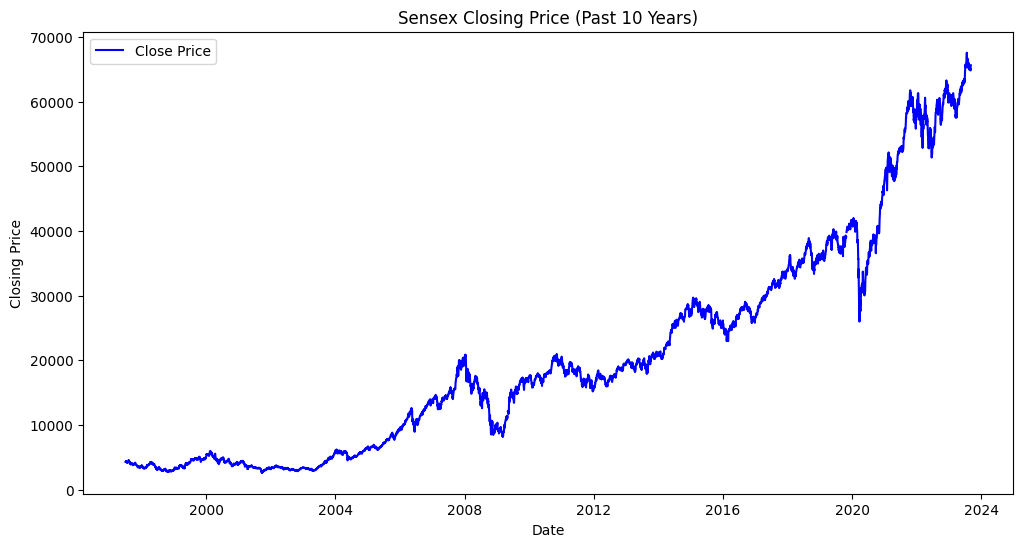

/tmp/ipython-input-39796938.py:57: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/tmp/ipython-input-39796938.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

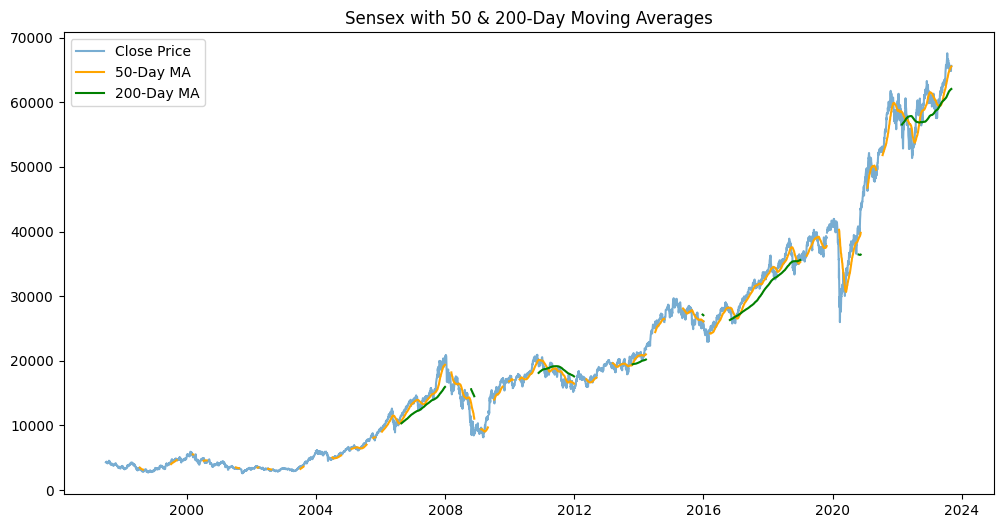

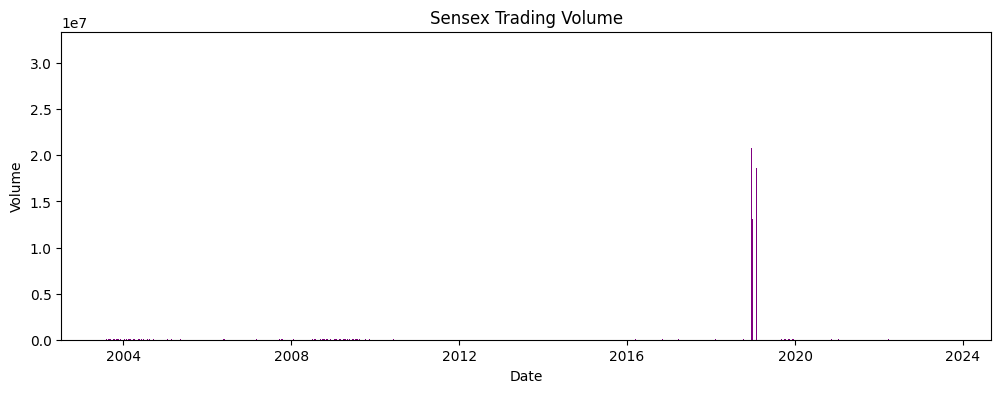

/tmp/ipython-input-39796938.py:98: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



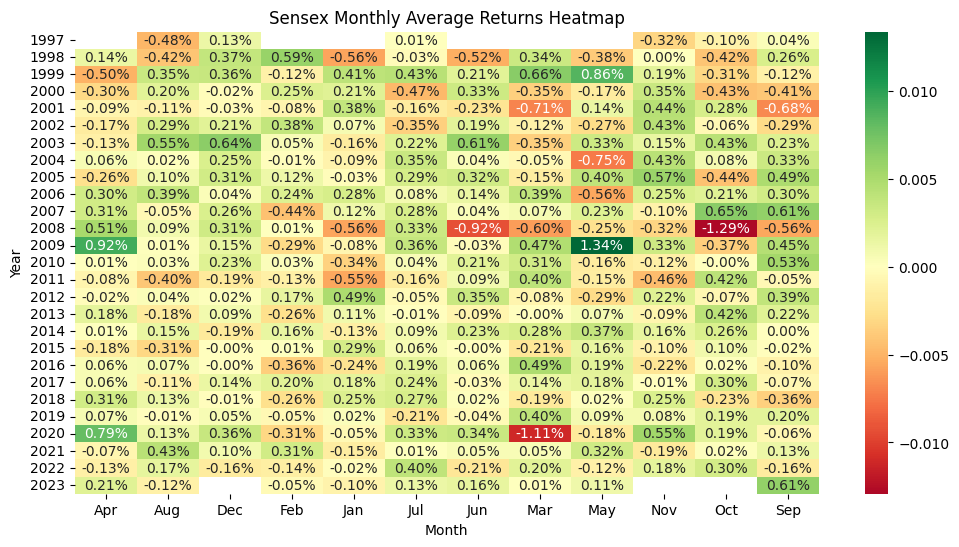

In [10]:
# Step 1: Upload your sensex.csv file
from google.colab import files
uploaded = files.upload()   # Select your CSV file

# Step 2: Load data with Pandas
import pandas as pd

df = pd.read_csv("Sensex_historical_price.csv")

# Clean price and volume columns by removing commas and converting to numeric
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    df[col] = df[col].astype(str).str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Combine Year, Month, Day into single Date column
df['Date'] = pd.to_datetime(
    df['Day'].astype(str) + '-' + df['Month'] + '-' + df['Year'].astype(str),
    format='%d-%b-%Y'
)

# Sort by Date
df = df.sort_values('Date').reset_index(drop=True)

print(df.head())

# ------------------- Charts -------------------
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# Step 3: Line Chart – Closing Price
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Close Price", color="blue")
plt.title("Sensex Closing Price (Past 10 Years)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

# Step 4: Candlestick Chart (Normal)
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='green',  # green = up
    decreasing_line_color='red'     # red = down
)])
fig.update_layout(title="Sensex Candlestick Chart", xaxis_rangeslider_visible=False)
fig.show()

# Step 4b: Heikin Ashi Candlestick Chart
ha_df = df.copy()
ha_df['HA_Close'] = (ha_df['Open'] + ha_df['High'] + ha_df['Low'] + ha_df['Close']) / 4
ha_df['HA_Open'] = 0.0
ha_df['HA_Open'].iloc[0] = (ha_df['Open'].iloc[0] + ha_df['Close'].iloc[0]) / 2

for i in range(1, len(ha_df)):
    ha_df.loc[i, 'HA_Open'] = (ha_df.loc[i-1, 'HA_Open'] + ha_df.loc[i-1, 'HA_Close']) / 2

ha_df['HA_High'] = ha_df[['High','HA_Open','HA_Close']].max(axis=1)
ha_df['HA_Low'] = ha_df[['Low','HA_Open','HA_Close']].min(axis=1)

fig_ha = go.Figure(data=[go.Candlestick(
    x=ha_df['Date'],
    open=ha_df['HA_Open'],
    high=ha_df['HA_High'],
    low=ha_df['HA_Low'],
    close=ha_df['HA_Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])
fig_ha.update_layout(title="Sensex Heikin-Ashi Candlestick Chart", xaxis_rangeslider_visible=False)
fig_ha.show()

# Step 5: Moving Averages
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['Date'], df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['MA200'], label='200-Day MA', color='green')
plt.title("Sensex with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()

# Step 6: Volume Chart
plt.figure(figsize=(12,4))
plt.bar(df['Date'], df['Volume'], color='purple')
plt.title("Sensex Trading Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

# Step 7: Heatmap of Monthly Returns
df['Return'] = df['Close'].pct_change()
pivot = df.pivot_table(index='Year', columns='Month', values='Return', aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="RdYlGn", center=0)
plt.title("Sensex Monthly Average Returns Heatmap")
plt.show()
